In [2]:
import os
import json
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load all nb json files in processed folder
nb_json_folder = 'outp/'
notebooks = []
for file in os.listdir(nb_json_folder):
    if file.endswith(".json"):
        with open(os.path.join(nb_json_folder, file), 'r') as f:
            nb_json = json.load(f)
            notebooks.append(nb_json)

# Load nb similarities
nb_sim = 'outp/DistilBERT_nb_similarities.pkl'
with open(nb_sim, 'rb') as f:
    nb_sim_matrix = pickle.load(f)

nb_sim_matrix = np.array(nb_sim_matrix)
print(nb_sim_matrix.shape)


(98, 98)


In [3]:
# Remove notebook 89, as it is an outlier (Chinese notebook)
notebooks.pop(89)
nb_sim_matrix = np.delete(nb_sim_matrix, 89, axis=0)
nb_sim_matrix = np.delete(nb_sim_matrix, 89, axis=1)
print(nb_sim_matrix.shape)


(97, 97)


# Task 2 - Graphical Overview

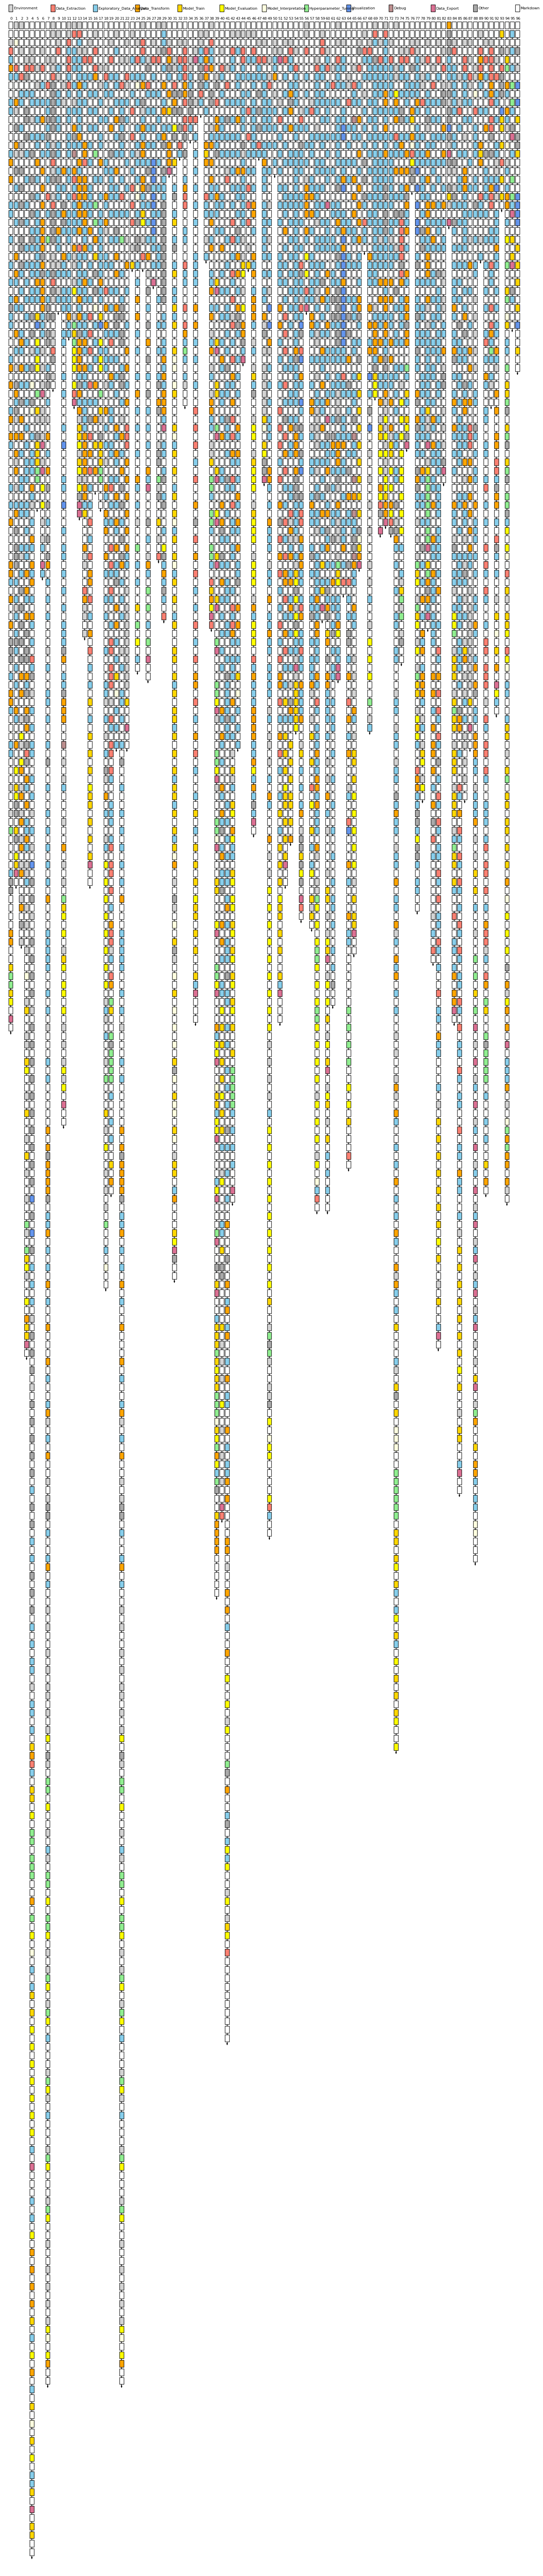

In [53]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

color_cell_type = False
color_classification = True

class_colors = {
    "Environment": 'lightgrey',
    "Data_Extraction": 'salmon',
    "Exploratory_Data_Analysis": 'skyblue',
    "Data_Transform": 'orange',
    "Model_Train": 'gold',
    "Model_Evaluation": 'yellow',
    "Model_Interpretation": 'lightyellow',
    "Hyperparameter_Tuning": 'lightgreen',
    "Visualization": 'cornflowerblue',
    "Debug": 'rosybrown',
    "Data_Export": 'palevioletred',
    "Other": 'darkgray',
    "Markdown": 'white'
    }


# Assuming your notebooks list is already populated and you've removed the outlier

# Create the graphical view
fig, ax = plt.subplots(figsize=(20, 100))

# Set limits for the axes
ax.set_xlim(-1, len(notebooks))
ax.set_ylim(0, max(len(nb['all_cells']) for nb in notebooks) + 4)  # Extra space at the top for legend and indices

max_y = max(len(nb['all_cells']) for nb in notebooks) + 2

# Remove axes
ax.axis('off')

if color_cell_type:
    # Draw the legend rectangles at the top
    legend_y = max_y + 1 # Position above the notebook indices

    # Draw a rectangle for code cells
    code_rect = patches.Rectangle((0, legend_y), 0.8, 0.8, linewidth=1, edgecolor='black', facecolor='lightgreen')
    ax.add_patch(code_rect)
    ax.text(1, legend_y + 0.4, 'Code', ha='left', va='center', fontsize=8)

    # Draw a rectangle for markdown cells
    markdown_rect = patches.Rectangle((4, legend_y), 0.8, 0.8, linewidth=1, edgecolor='black', facecolor='lightblue')
    ax.add_patch(markdown_rect)
    ax.text(5, legend_y + 0.4, 'Markdown', ha='left', va='center', fontsize=8)

if color_classification:
    # Draw the legend rectangles at the top
    legend_y = max_y + 1 # Position above the notebook indices

    for i, (class_name, color) in enumerate(class_colors.items()):
        class_rect = patches.Rectangle((i*8, legend_y), 0.8, 0.8, linewidth=1, edgecolor='black', facecolor=color)
        ax.add_patch(class_rect)
        ax.text((i*8)+1, legend_y + 0.4, class_name, ha='left', va='center', fontsize=8)

# Draw each notebook as a vertical line of blocks starting from the top
for nb_idx, notebook in enumerate(notebooks):
    num_cells = len(notebook['all_cells'])  # Number of cells in the notebook
    
    # Print the notebook index at the top (1 row above the highest cell)
    ax.text(nb_idx + 0.5, max_y, str(nb_idx), ha='center', va='bottom', fontsize=8)
    
    for i, cell in enumerate(notebook['all_cells']):
        if color_classification:
            color = class_colors[cell['classification']]
        if color_cell_type:
            cell_type = cell['cell_type']
            if cell_type == 'markdown':
                color = 'lightblue'
            elif cell_type == 'code':
                color = 'lightgreen'
            else:
                color = 'lightgrey'
            
        # Calculate y position from the top
        y_pos = max_y - i - 1  # Offset to ensure top-down alignment
        
        # Draw a rectangle for each cell
        rect = patches.Rectangle((nb_idx, y_pos), 0.8, 0.8, linewidth=1, edgecolor='black', facecolor=color)
        ax.add_patch(rect)
        
        # Draw an arrow to the next cell
        if i < len(notebook['all_cells']) - 1:
            ax.arrow(nb_idx + 0.4, y_pos - 0.4, 0, -0.8, head_width=0.2, head_length=0.2, fc='black', ec='black')

# Show the plot
plt.show()

# Task 2 Classification Distribution

C:\Users\s169225\AppData\Local\Temp\ipykernel_9480\595973348.py:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(fixed_order, rotation=45, ha='right', fontsize=8)
C:\Users\s169225\AppData\Local\Temp\ipykernel_9480\595973348.py:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(fixed_order, rotation=45, ha='right', fontsize=8)
C:\Users\s169225\AppData\Local\Temp\ipykernel_9480\595973348.py:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(fixed_order, rotation=45, ha='right', fontsize=8)
C:\Users\s169225\AppData\Local\Temp\ipykernel_9480\595973348.py:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(fixed_order, rotation=45, ha='right', fontsize=8)
C:\Users\s169225\AppData\Local\Temp\ipykernel_9480\595973348.py:65: UserWarning: FixedFormatter should only be used together with FixedLocator
 

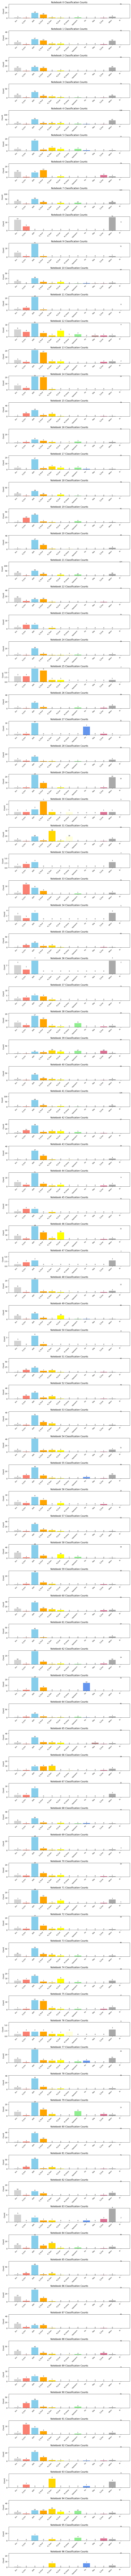

In [47]:
from collections import Counter

# Updated classification colors dictionary with abbreviations
class_colors = {
    "Env": 'lightgrey',
    "D_Extr": 'salmon',
    "EDA": 'skyblue',
    "D_Trnsf": 'orange',
    "M_Train": 'gold',
    "M_Eval": 'yellow',
    "M_Interp": 'lightyellow',
    "Hyperprm": 'lightgreen',
    "Vis": 'cornflowerblue',
    "Dbg": 'rosybrown',
    "D_Exp": 'palevioletred',
    "Other": 'darkgray',
    "M": 'white'
}

# Mapping from full names to abbreviations
classification_abbr = {
    "Environment": "Env",
    "Data_Extraction": "D_Extr",
    "Exploratory_Data_Analysis": "EDA",
    "Data_Transform": "D_Trnsf",
    "Model_Train": "M_Train",
    "Model_Evaluation": "M_Eval",
    "Model_Interpretation": "M_Interp",
    "Hyperparameter_Tuning": "Hyperprm",
    "Visualization": "Vis",
    "Debug": "Dbg",
    "Data_Export": "D_Exp",
    "Other": "Other",
    "Markdown": "M"
}

# Define a fixed order for the classifications
fixed_order = list(classification_abbr.values())

# Iterate through each notebook and create a bar chart for classification count
fig, axes = plt.subplots(len(notebooks), 1, figsize=(10, len(notebooks) * 2))

if len(notebooks) == 1:
    axes = [axes]  # Ensure axes is iterable even for a single notebook

for nb_idx, (notebook, ax) in enumerate(zip(notebooks, axes)):
    # Count the classifications with abbreviations
    classifications = [classification_abbr.get(cell.get('classification', 'Other'), 'Other') for cell in notebook['all_cells']]
    class_count = Counter(classifications)
    
    # Ensure all classifications are represented, even with a count of 0
    counts_in_order = [class_count.get(classification, 0) for classification in fixed_order]
    
    # Plot the bar chart
    bars = ax.bar(fixed_order, counts_in_order, color=[class_colors[key] for key in fixed_order])
    
    # Add counts on top of each bar
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=8)
    
    # Set the title for the bar chart
    ax.set_title(f'Notebook {nb_idx} Classification Counts')
    ax.set_ylabel('Count')
    ax.set_xticklabels(fixed_order, rotation=45, ha='right', fontsize=8)
    
plt.tight_layout()
plt.show()


# Explore Query words

In [48]:
# Iterate over all notebooks
for nb_idx, notebook in enumerate(notebooks):
    print(f"Notebook {nb_idx}:")
    
    # List to store all keywords from the notebook
    all_keywords = []
    
    # Iterate over all cells in the notebook
    for i in range(len(notebook['all_cells'])):
        keywords_dict = notebook['all_cells'][i]['detailed_scores']
        
        # If the dictionary is empty, initialize it as {'None': []}
        if not keywords_dict:
            keywords_dict = {'None': []}
        if isinstance(keywords_dict, list):
            keywords_dict = keywords_dict[0]
        
        # Extract all keywords from the detailed scores
        keywords = []
        for key in keywords_dict:
            keywords.extend(keywords_dict[key])
        
        # Add the extracted keywords to the list
        all_keywords.extend(keywords)
    
    # Print the keywords for the current notebook
    unique_keywords = set(all_keywords)  # To get unique keywords
    print(f"Keywords ({len(unique_keywords)} unique):")
    for keyword in sorted(unique_keywords):
        print(f"- {keyword}")
    print("\n" + "-"*40 + "\n")  # Separator between notebooks

    


Notebook 0:
Keywords (63 unique):
- .apply
- .apply(
- .astype(
- .boxplot(
- .concat
- .concat(
- .describe
- .describe(
- .drop
- .fillna
- .fillna(
- .fit(
- .get_dummies
- .head
- .head(
- .isnull
- .kde
- .linear
- .map
- .map(
- .mean
- .mean(
- .mod
- .mode
- .predict(
- .replace
- .replace(
- .show
- .sort_values
- .split
- .sum
- .to_csv(
- adaboostclassifier
- columns
- cross_val_score
- describe
- distplot
- fit_transform
- gradient
- gradientboostingclassifier
- gridsearchcv
- head
- import 
- kfold
- kneighborsclassifier
- logisticregression
- matplotlib
- model
- model_selection
- param
- param_grid
- pd.read_
- pipeline
- pyplot
- randomforestclassifier
- ravel
- read_csv
- size
- sns.
- standardscaler
- svc
- to_csv
- transform

----------------------------------------

Notebook 1:
Keywords (65 unique):
- .add
- .astype(
- .bar(
- .concat
- .concat(
- .drop
- .exp
- .fillna
- .fillna(
- .fit(
- .groupby
- .groupby(
- .head
- .head(
- .histogram(
- .isna
- .linear
- .max

In [52]:
from collections import Counter, defaultdict

# Dictionary to store the occurrence of each keyword and the notebooks they appear in
keyword_occurrences = defaultdict(lambda: {"count": 0, "notebooks": set()})

# Iterate over all notebooks
for nb_idx, notebook in enumerate(notebooks):
    # List to store all keywords from the notebook
    for i in range(len(notebook['all_cells'])):
        keywords_dict = notebook['all_cells'][i]['detailed_scores']
        
        # If the dictionary is empty, initialize it as {'None': []}
        if not keywords_dict:
            keywords_dict = {'None': []}
        if isinstance(keywords_dict, list):
            keywords_dict = keywords_dict[0]
        
        # Extract all keywords from the detailed scores
        keywords = []
        for key in keywords_dict:
            keywords.extend(keywords_dict[key])
        
        # Update keyword occurrences and the notebooks they appear in
        for keyword in keywords:
            keyword_occurrences[keyword]["count"] += 1
            keyword_occurrences[keyword]["notebooks"].add(nb_idx)

# Find the 20 most frequently occurring keywords
top_20_keywords = Counter({k: v["count"] for k, v in keyword_occurrences.items()}).most_common(20)

# Print the top 20 keywords along with the notebooks they occur in
print("Top 20 most frequently occurring keywords and their occurrences in notebooks:\n")
for keyword, count in top_20_keywords:
    notebooks_with_keyword = sorted(keyword_occurrences[keyword]["notebooks"])
    print(f"Keyword: {keyword} (Count: {count})")
    print(f"Occurs in Notebooks: {', '.join(map(str, notebooks_with_keyword))}")
    print("\n" + "-"*40 + "\n")  # Separator between keywords

Top 20 most frequently occurring keywords and their occurrences in notebooks:

Keyword: model (Count: 1845)
Occurs in Notebooks: 0, 1, 2, 3, 4, 5, 6, 7, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 64, 65, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96

----------------------------------------

Keyword: sns. (Count: 1512)
Occurs in Notebooks: 0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 35, 37, 38, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 63, 64, 65, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 79, 80, 81, 84, 85, 86, 87, 88, 89, 90, 91, 92, 94

----------------------------------------

Keyword: size (Count: 831)
Occurs in Notebooks: 0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 14, 15, 

# Clustering

c:\Anaconda3\envs\ml_course\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


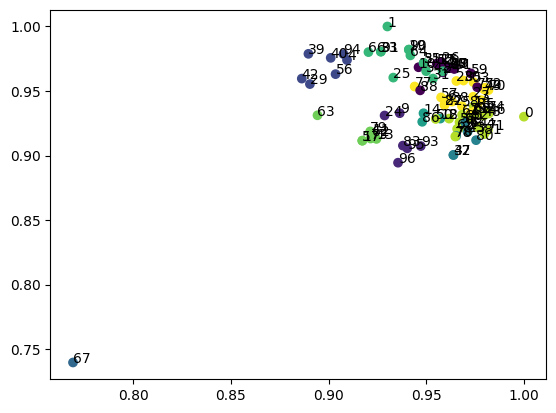

[8 6 0 9 2 7 9 9 8 1 0 7 5 7 5 0 0 7 8 6 0 9 9 4 1 6 0 9 9 2 9 6 4 6 8 6 8
 0 9 2 2 0 2 0 8 4 8 4 8 9 8 6 0 9 6 8 2 9 9 0 8 8 7 7 6 8 6 3 9 4 9 8 9 7
 8 0 4 9 8 7 4 8 8 1 6 9 5 9 0 0 6 6 8 1 2 1 1]
Cluster 0: (count 14) 	 [2, 10, 15, 16, 20, 26, 37, 41, 43, 52, 59, 75, 88, 89]
Cluster 1: (count 6) 	 [9, 24, 83, 93, 95, 96]
Cluster 2: (count 7) 	 [4, 29, 39, 40, 42, 56, 94]
Cluster 3: (count 1) 	 [67]
Cluster 4: (count 7) 	 [23, 32, 45, 47, 69, 76, 80]
Cluster 5: (count 3) 	 [12, 14, 86]
Cluster 6: (count 13) 	 [1, 19, 25, 31, 33, 35, 51, 54, 64, 66, 84, 90, 91]
Cluster 7: (count 8) 	 [5, 11, 13, 17, 62, 63, 73, 79]
Cluster 8: (count 19) 	 [0, 8, 18, 34, 36, 44, 46, 48, 50, 55, 60, 61, 65, 71, 74, 78, 81, 82, 92]
Cluster 9: (count 19) 	 [3, 6, 7, 21, 22, 27, 28, 30, 38, 49, 53, 57, 58, 68, 70, 72, 77, 85, 87]


In [49]:
# perform k-means clustering on the similarity matrix
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=42).fit(nb_sim_matrix)

# plot the clusters, plot the nb_idx next to the data point
fig, ax = plt.subplots()
ax.scatter(nb_sim_matrix[:,0], nb_sim_matrix[:,1], c=kmeans.labels_)
for i, txt in enumerate(range(len(notebooks))):
    ax.annotate(txt, (nb_sim_matrix[i,0], nb_sim_matrix[i,1]))
plt.show()

# save the cluster labels
cluster_labels = kmeans.labels_
print(cluster_labels)

# print per cluster, the count of how much, and which notebooks are in it
for i in range(10):
    print(f'Cluster {i}: (count {np.sum(cluster_labels == i)}) \t {[idx for idx, label in enumerate(cluster_labels) if label == i]}')	

